In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
%autoreload 2
from trader.tradertk import *

In [126]:
with open('data/retDAX.txt', 'r') as f:
    tmp = f.read()
    
retDAX = list(map(lambda x: float(x), tmp.split()))

with open('data/DAX.txt', 'r') as f:
    tmp = f.read()
    
DAX = list(map(lambda x: float(x), tmp.split()))

M = 10  # The number of time series inputs to the trader.
T = 500
N = 100

initial_theta = np.ones((M+2, 1))  # Initialize theta.

X = retDAX

Xn = featureNormalize(X)

# Ft = np.zeros((T+1, 1))
Ft = np.ones(T+1)  # Holdings at period t.

miu = 1  # maximum possible number of shares per transaction
delta = 0.001  # The cost for a transaction at period t

Ret, sharp = rewardFunction(X, miu, delta, Ft, M)

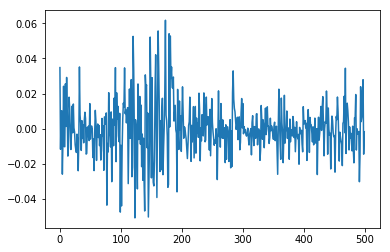

In [127]:
plt.plot(Ret)
plt.show()

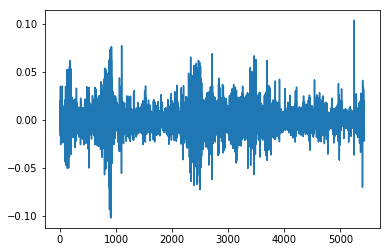

In [121]:
plt.plot(retDAX)
plt.show()

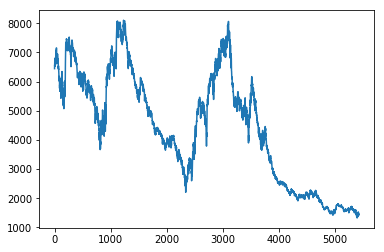

In [88]:
plt.plot(DAX)
plt.show()

/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/AntonKarazeev/WD/cloned_git/Algorithms/src/trader/tradertk.py:63: RuntimeWarning: divide by zero encountered in double_scalars
  return np.mean(Ret) / np.std(Ret)


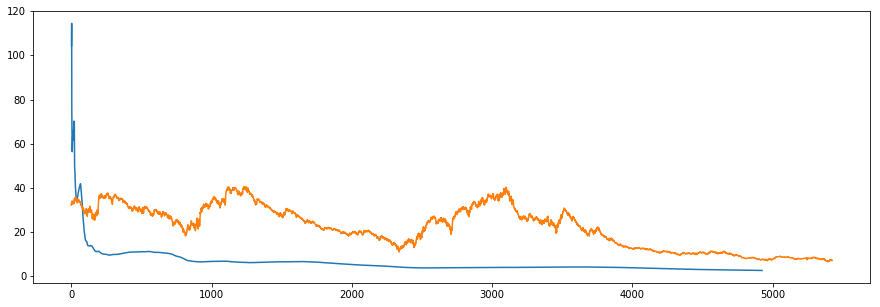

In [115]:
plt.figure(figsize=(15,5))
plt.plot([sharpRatio(DAX[:t]) for t in range(len(retDAX)-499)])
plt.plot([t/200 for t in DAX])
plt.show()